# [Computer Vision] Assignment #1

본 과제의 목적은 기본적인 이미지 처리 과정을 이해하는 것을 목표로 함.

* 이미지 불러오기, 색 변환, 콘벌루션, 이미지 필터링에 대한 전반적인 내용을 다루고 있음.
* 과제는 스스로 수행하는 것을 원칙으로 함 (잘 모르겠으면 구글링해서 직접 결과물을 확인하는 것을 권장함).
* import 하는 라이브러리 외에 python 내에서 사용 가능한 라이브러리 자유롭게 사용 가능.
* 정답을 제출하는 것도 중요하지만, 해당 과정을 통해 이미지 처리, 콘벌루션, 필터링에 대한 이해를 하는 것이 중요함.

## 1. Data preparation (10 points)

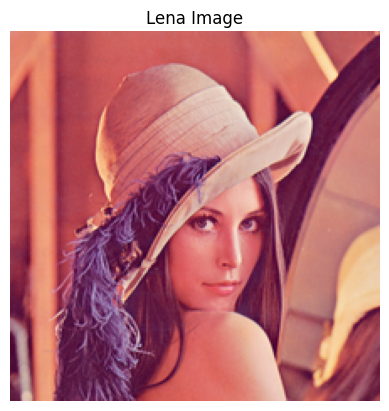

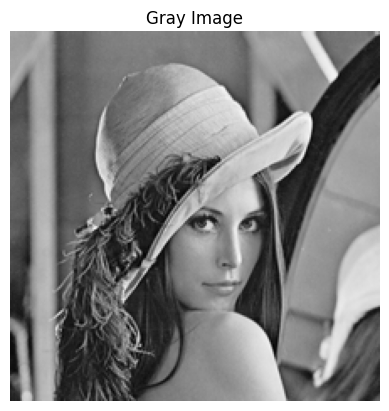

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 아래의 링크에서 레나 이미지 준비
# https://ko.wikipedia.org/wiki/%EB%A0%88%EB%82%98_(%EC%9D%B4%EB%AF%B8%EC%A7%80)

# 이미지를 colab 에 업로드
# 좌측 카테고리에 폴더 모양 클릭 후그래그를 통한 업로드

### 이미지 불러오기 (1 point)
image_path = "Lenna.png"
image = Image.open(image_path)


### 이미지 변환 (1 point)
# PIL.Image 를 np.array 로 변환

image = np.array(image)


### 이미지 시각화 (1 point)

plt.imshow(image)
plt.axis('off')
plt.title('Lena Image')
plt.show()

### 'rgb2gray' 함수 정의 (5 points)
# 해당 함수는 RGB 이미지를 받아서 gray 이미지를 리턴
# G = 0.299 * R + 0.587 * G + 0.114 * B
def rgb2gray(image):
    return np.dot(image[...,:3], [0.299, 0.587, 0.114])

### RGB를 gray 이미지로 변환 (1 point)
image_gray = rgb2gray(image)


### gray 이미지 시각화 (1 point)
plt.imshow(image_gray,cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title('Gray Image')
plt.show()

## 2. Convolution from scratch (10 points)

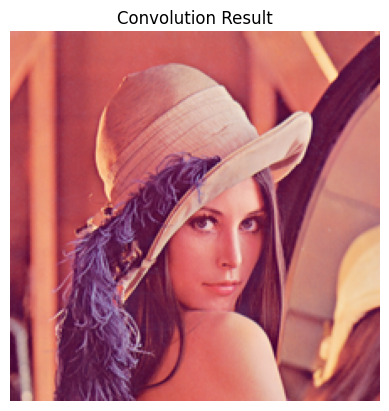

In [5]:
### identity 커널 정의 (1 point)
# 해당 커널을 필터링해도 이미지를 변화시키지 않음
kernel = np.array([[0, 0, 0],
                   [0, 1, 0],
                   [0, 0, 0]])


### 'conv2d' 함수 정의 (7 points)
# 해당 함수는 이미지와 커널을 입력으로 받음
# 'np.pad'를 활용하여 이미지 외부를 0으로 패딩(padding)할 수 있음
# 패딩 사이즈는 (사용하는 이미지에 컨벌루션이 동작할 수 있도록) 임의로 조절 가능
def conv2d(image, kernel):

  result = image.copy()

  image_shape = image.shape
  kernel_shape = kernel.shape

  i_h = image_shape[0]
  i_w = image_shape[1]

  k_h = kernel_shape[0]
  k_w = kernel_shape[1]

  del_y = int(k_h / 2)
  del_x = int(k_w / 2)

  pad_u = pad_d = pad_l = pad_r = 0

  if k_h == k_w:
    pad_u = pad_d = pad_l = pad_r = int(k_h / 2)
  elif k_h > k_w:
    pad_u = pad_d = int((k_h-k_w)/2)
  else:
    pad_l = pad_r = int((k_w-k_h)/2)

  #print(pad_u, pad_d, pad_l, pad_r)
  channels = 3
  if len(image.shape) == 2:
    channels = 1

  #print(channels)
  for i in range(channels):
    #i번째 채널
    if channels == 1:
        ret = image.copy()
    else:
        ret = image[...,i].copy()
    paded_img = np.pad(ret, ((pad_u, pad_d),(pad_l, pad_r)))

    # padding h 만큼 이동 후 이미지의 h만큼 루프
    for y in range(pad_u, pad_u+i_h):
      # padding w만큼 이동 후 이미지의 w만큼 루프
      for x in range(pad_l, pad_l+i_w):
        size = kernel.size
        ret[y-del_y,x-del_x] = np.dot(paded_img[y-del_y:y+del_y+1, x-del_x:x+del_x+1].reshape(size), np.flip(kernel.reshape(size)) )
        if channels == 1:
            result = ret
        else:
            result[...,i] = ret
  return result

### 이미지에 컨벌루션 적용(1 point)
image_conv = conv2d(image, kernel)


### 컨벌루션 결과 시각화 (1 point)
plt.imshow(image_conv)
plt.axis('off')
plt.title('Convolution Result')
plt.show()


## 3. Peak Signal-to-Noise Ratio (PSNR) (6 points)

In [6]:
from math import log10, sqrt

### 'PSNR' 함수 정의 (6 points)
# 해당 함수는 원본 이미지와 필터링된 이미지를 받아 두 이미지의 quality 를 비교함
# 함수 구현은 다음의 웹페이지 참조
# https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio
def PSNR(original, filtered):
    MSE = np.mean((original - filtered)**2)
    psnr = 20*log10(255) - 10* log10(MSE)
    return psnr

## 4. Average filter (8 points)

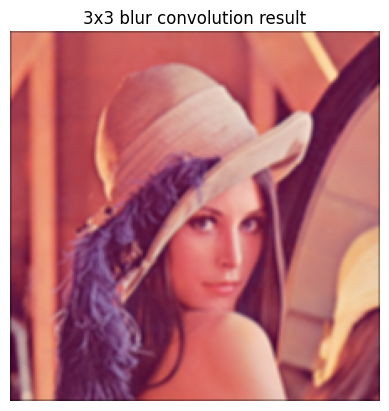

psnr =  35.014303585972506


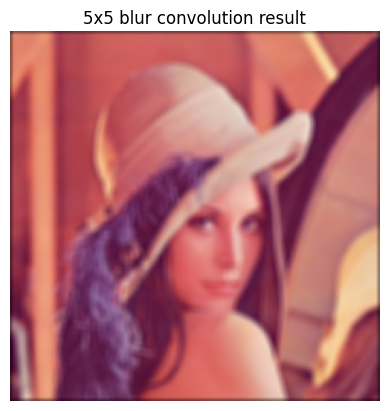

psnr =  33.161392108987236


In [7]:
### 3 by 3 평균 블러 커널 정의 (1 point)
kernel_avg_3X3 = (1/9) * np.ones((3,3))

### 불러온 이미지에 커널 적용 (1 point)
image_conv = conv2d(image, kernel_avg_3X3)


### 컨벌루션 결과 시각화 (1 point)
plt.imshow(image_conv)
plt.axis('off')
plt.title('3x3 blur convolution result')
plt.show()

### PSNR 계산 (1 point)
# 원본 이미지와, 컨벌루션 된 이미지 활용
psnr = PSNR(image, image_conv)
print("psnr = ", psnr)


### 5 by 5 평균 블러 커널 정의 (1 point)
kernel_avg_5X5 = (1/25) * np.ones((5,5))


### 불러온 이미지에 커널 적용 (1 point)
image_conv = conv2d(image, kernel_avg_5X5)


### 컨벌루션 결과 시각화 (1 point)

plt.imshow(image_conv)
plt.axis('off')
plt.title('5x5 blur convolution result')
plt.show()

### PSNR 계산 (1 point)
psnr = PSNR(image, image_conv)
print("psnr = ", psnr)


## 5. Noise reduction (10 points)

In [8]:
from random import random

### 'salt_and_pepper' 함수 정의 (4 points)
# 해당 함수는 랜덤하게 노이즈를 발생시킴
# 특정한 픽셀 값은 겁정(0)으로 만들고, 또 다른 특정 픽셀에 대해서는 흰색(255)으로 변환
def salt_and_pepper(image):
    output = image.copy()

    for n in range(1000):
        x = image.shape[0]
        y = image.shape[1]
        rand_x = np.random.randint(0,x-1)
        rand_y = np.random.randint(0,y-1)
        salt_or_pepper = (np.random.randint(0,10000) % 2) * 255
        #print(salt_or_pepper)
        output[rand_x,rand_y,:3] = salt_or_pepper

    return output


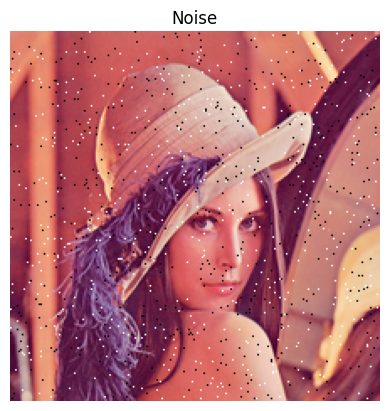

psnr =  46.112305886339726


In [10]:
### 이미지에 salt_and_pepper 함수 적용(1 point)
image_noise = salt_and_pepper(image)


### 컨벌루션 결과 시각화 (1 point)
plt.imshow(image_noise)
plt.axis('off')
plt.title('Noise')
plt.show()
### PSNR 계산 (1 point)
psnr = PSNR(image, image_noise)
print("psnr = ", psnr)

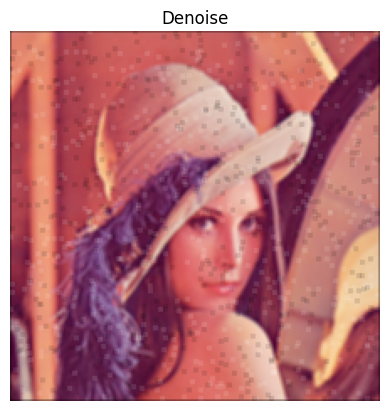

psnr =  33.42028956939437


In [12]:
### 3 by 3 평균 블러 커널 활용하여 denoise 수행 (1 point)
image_denoise =conv2d(image_noise, kernel_avg_3X3)


### 컨벌루션 결과 시각화 (1 point)
plt.imshow(image_denoise)
plt.axis('off')
plt.title('Denoise')
plt.show()
### PSNR 계산 (1 point)
psnr  = PSNR(image, image_denoise)
print("psnr = ", psnr)

## 6. Sobel operator (6 points)

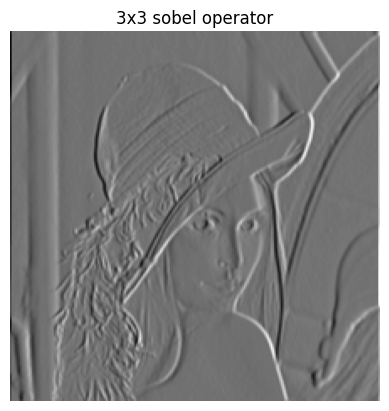

In [14]:
### x 방향으로 3 by 3 sobel 연산자 정의 (1 point)
kernel_x = np.array([[-1,0, 1],
                     [-2,0, 2],
                     [-1,0, 1]])


### 이미지에 컨벌루션 적용(1 point)
image_conv =conv2d(image_gray, kernel_x)



### 컨벌루션 결과 시각화 (1 point)
plt.imshow(image_conv, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title('3x3 sobel operator')
plt.show()

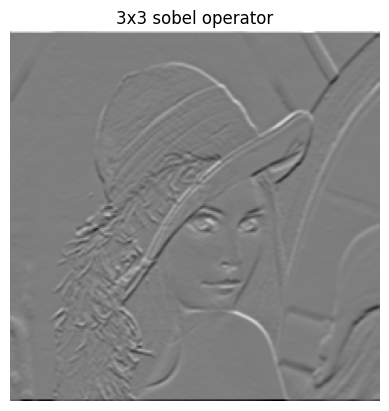

In [13]:
### y 방향으로 3 by 3 sobel 연산자 정의 (1 point)
kernel_y = np.array([[1,2, 1],
       [0,0, 0],
       [-1,-2, -1]])


### 이미지에 컨벌루션 적용(1 point)
image_conv = conv2d(image_gray, kernel_y)


### 컨벌루션 결과 시각화 (1 point)
plt.imshow(image_conv,cmap=plt.get_cmap('gray'))
plt.title('3x3 sobel operator')
plt.axis('off')
plt.show()